The dataset is downloaded from:

* https://data.mendeley.com/datasets/bzk9zbyvv7
<!-- * https://data.mendeley.com/datasets/kn3x9rz3kd -->

In [54]:
# Importing Packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [55]:
df=pd.read_csv('ONLINE EDUCATION SYSTEM REVIEW.csv') # reading the dataset into a dataframe
df.head()

,Gender,Home Location,Level of Education,Age(Years),Number of Subjects,Device type used to attend classes,Economic status,Family size,Internet facility in your locality,Are you involved in any sports?,...,Time spent on social media (Hours),Interested in Gaming?,Have separate room for studying?,Engaged in group studies?,Average marks scored before pandemic in traditional classroom,Your interaction in online mode,Clearing doubts with faculties in online mode,Interested in?,Performance in online,Your level of satisfaction in Online Education
0,Male,Urban,Under Graduate,18,11,Laptop,Middle Class,4,5,No,...,1,No,No,No,91-100,1,1,Practical,6,Average
1,Male,Urban,Under Graduate,19,7,Laptop,Middle Class,4,1,Yes,...,1,Yes,Yes,No,91-100,1,1,Theory,3,Bad
2,Male,Rural,Under Graduate,18,5,Laptop,Middle Class,5,2,No,...,1,No,Yes,No,71-80,1,1,Both,6,Bad
3,Male,Urban,Under Graduate,18,5,Laptop,Middle Class,4,4,Yes,...,2,No,No,yes,91-100,1,2,Theory,4,Bad
4,Male,Rural,Under Graduate,18,5,Laptop,Middle Class,4,3,No,...,2,Yes,Yes,yes,81-90,3,3,Both,6,Average


In [56]:
df.info() # displaying the information of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033 entries, 0 to 1032
Data columns (total 23 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   Gender                                                         1033 non-null   object
 1   Home Location                                                  1033 non-null   object
 2   Level of Education                                             1033 non-null   object
 3   Age(Years)                                                     1033 non-null   int64 
 4   Number of Subjects                                             1033 non-null   int64 
 5   Device type used to attend classes                             1033 non-null   object
 6   Economic status                                                1033 non-null   object
 7   Family size                                                    1033 n

In [57]:
df.describe() # descriptive statistics of the numerical columns of the dataframe

,Age(Years),Number of Subjects,Family size,Internet facility in your locality,Study time (Hours),Sleep time (Hours),Time spent on social media (Hours),Your interaction in online mode,Clearing doubts with faculties in online mode,Performance in online
count,1033.000000,1033.00000,1033.000000,1033.000000,1033.000000,1033.000000,1033.000000,1033.000000,1033.000000,1033.000000
mean,19.798645,7.03485,4.413359,3.586641,4.325266,6.947725,2.636980,2.930300,2.833495,6.696031
std,3.199158,2.81034,1.236750,1.026063,2.134233,1.324039,1.859625,1.105387,1.163629,1.920048
min,9.000000,1.00000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,18.000000,6.00000,4.000000,3.000000,3.000000,6.000000,1.000000,2.000000,2.000000,6.000000
50%,19.000000,7.00000,4.000000,4.000000,4.000000,7.000000,2.000000,3.000000,3.000000,7.000000
75%,20.000000,8.00000,5.000000,4.000000,6.000000,8.000000,3.000000,4.000000,4.000000,8.000000
max,40.000000,20.00000,10.000000,5.000000,10.000000,10.000000,10.000000,5.000000,5.000000,10.000000


In [58]:
df.columns # displaying all the labels of the columns in the dataframe

Index(['Gender', 'Home Location', 'Level of Education', 'Age(Years)',
       'Number of Subjects', 'Device type used to attend classes',
       'Economic status', 'Family size', 'Internet facility in your locality',
       'Are you involved in any sports?', 'Do elderly people monitor you?',
       'Study time (Hours)', 'Sleep time (Hours)',
       'Time spent on social media (Hours)', 'Interested in Gaming?',
       'Have separate room for studying?', 'Engaged in group studies?',
       'Average marks scored before pandemic in traditional classroom',
       'Your interaction in online mode',
       'Clearing doubts with faculties in online mode', 'Interested in?',
       'Performance in online',
       'Your level of satisfaction in Online Education'],
      dtype='object')

In [59]:
df.shape

(1033, 23)

In [60]:
[print(c) for c in df.columns if df[c].dtype=="object"] # printing all the categorical columns of the dataset

Gender
Home Location
Level of Education
Device type used to attend classes
Economic status
Are you involved in any sports?
Do elderly people monitor you?
Interested in Gaming?
Have separate room for studying?
Engaged in group studies?
Average marks scored before pandemic in traditional classroom
Interested in?
Your level of satisfaction in Online Education


[None, None, None, None, None, None, None, None, None, None, None, None, None]

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

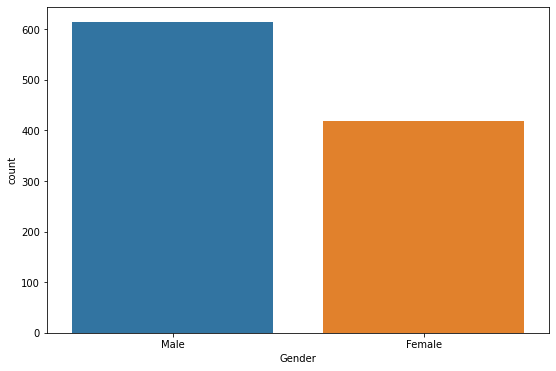

In [61]:
plt.figure(figsize=(9,6))
sns.countplot(df['Gender'])

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Economic status', ylabel='count'>

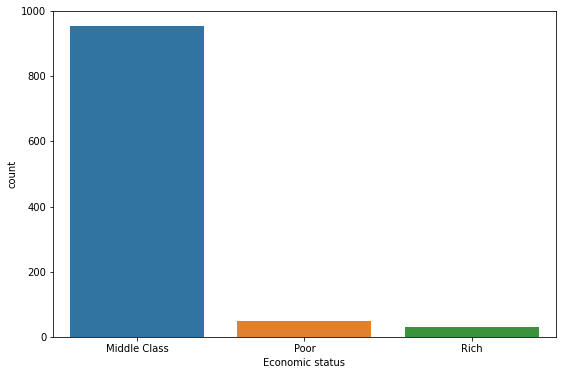

In [62]:
plt.figure(figsize=(9,6))
sns.countplot(df['Economic status'])

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Level of Education', ylabel='count'>

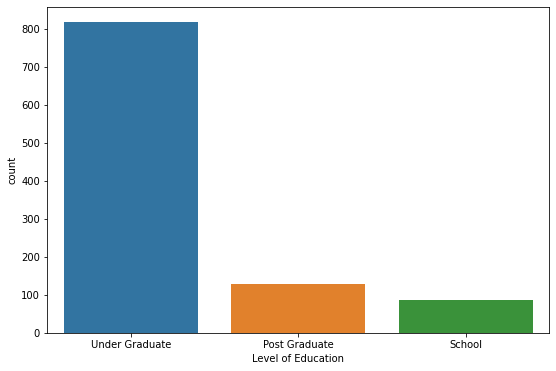

In [63]:
plt.figure(figsize=(9,6))
sns.countplot(df['Level of Education'])

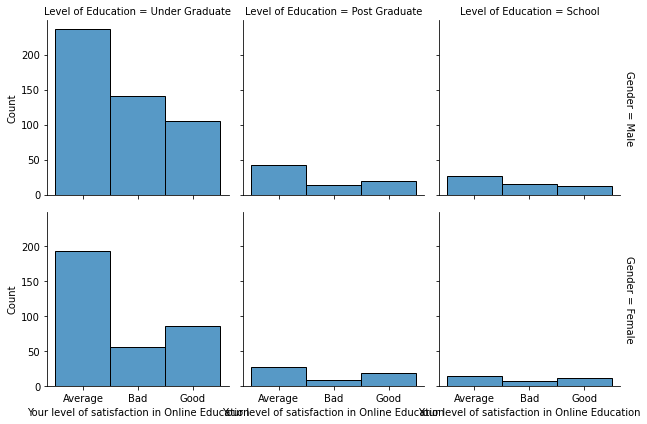

In [11]:
sns.displot(
    df, x="Your level of satisfaction in Online Education", col="Level of Education", row="Gender",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

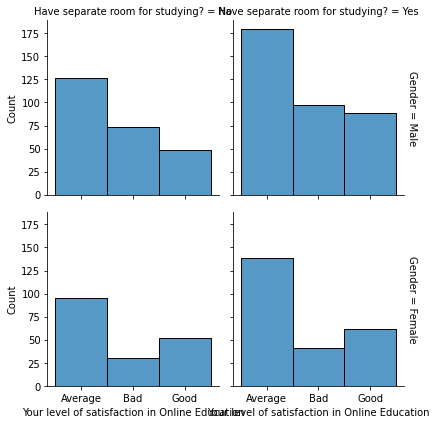

In [12]:
sns.displot(
    df, x="Your level of satisfaction in Online Education", col="Have separate room for studying?", row="Gender",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:1296: UserWarning: 91.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


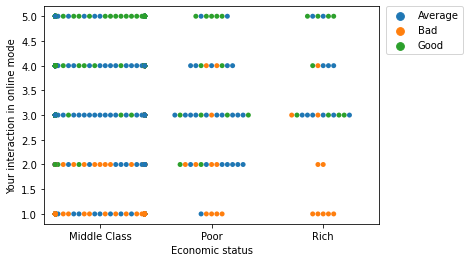

In [13]:
ax = sns.swarmplot(data=df, x="Economic status", y="Your interaction in online mode", hue="Your level of satisfaction in Online Education")
# ax.set(ylabel="")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:1296: UserWarning: 94.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:1296: UserWarning: 30.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:1296: UserWarning: 36.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


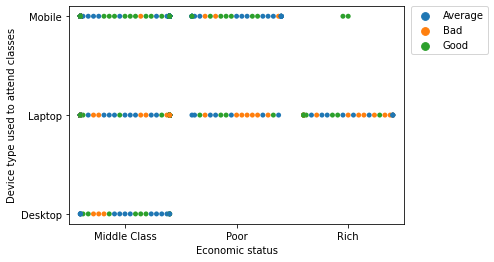

In [14]:
ax = sns.swarmplot(data=df, x="Economic status", y="Device type used to attend classes", hue="Your level of satisfaction in Online Education")
# ax.set(ylabel="")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

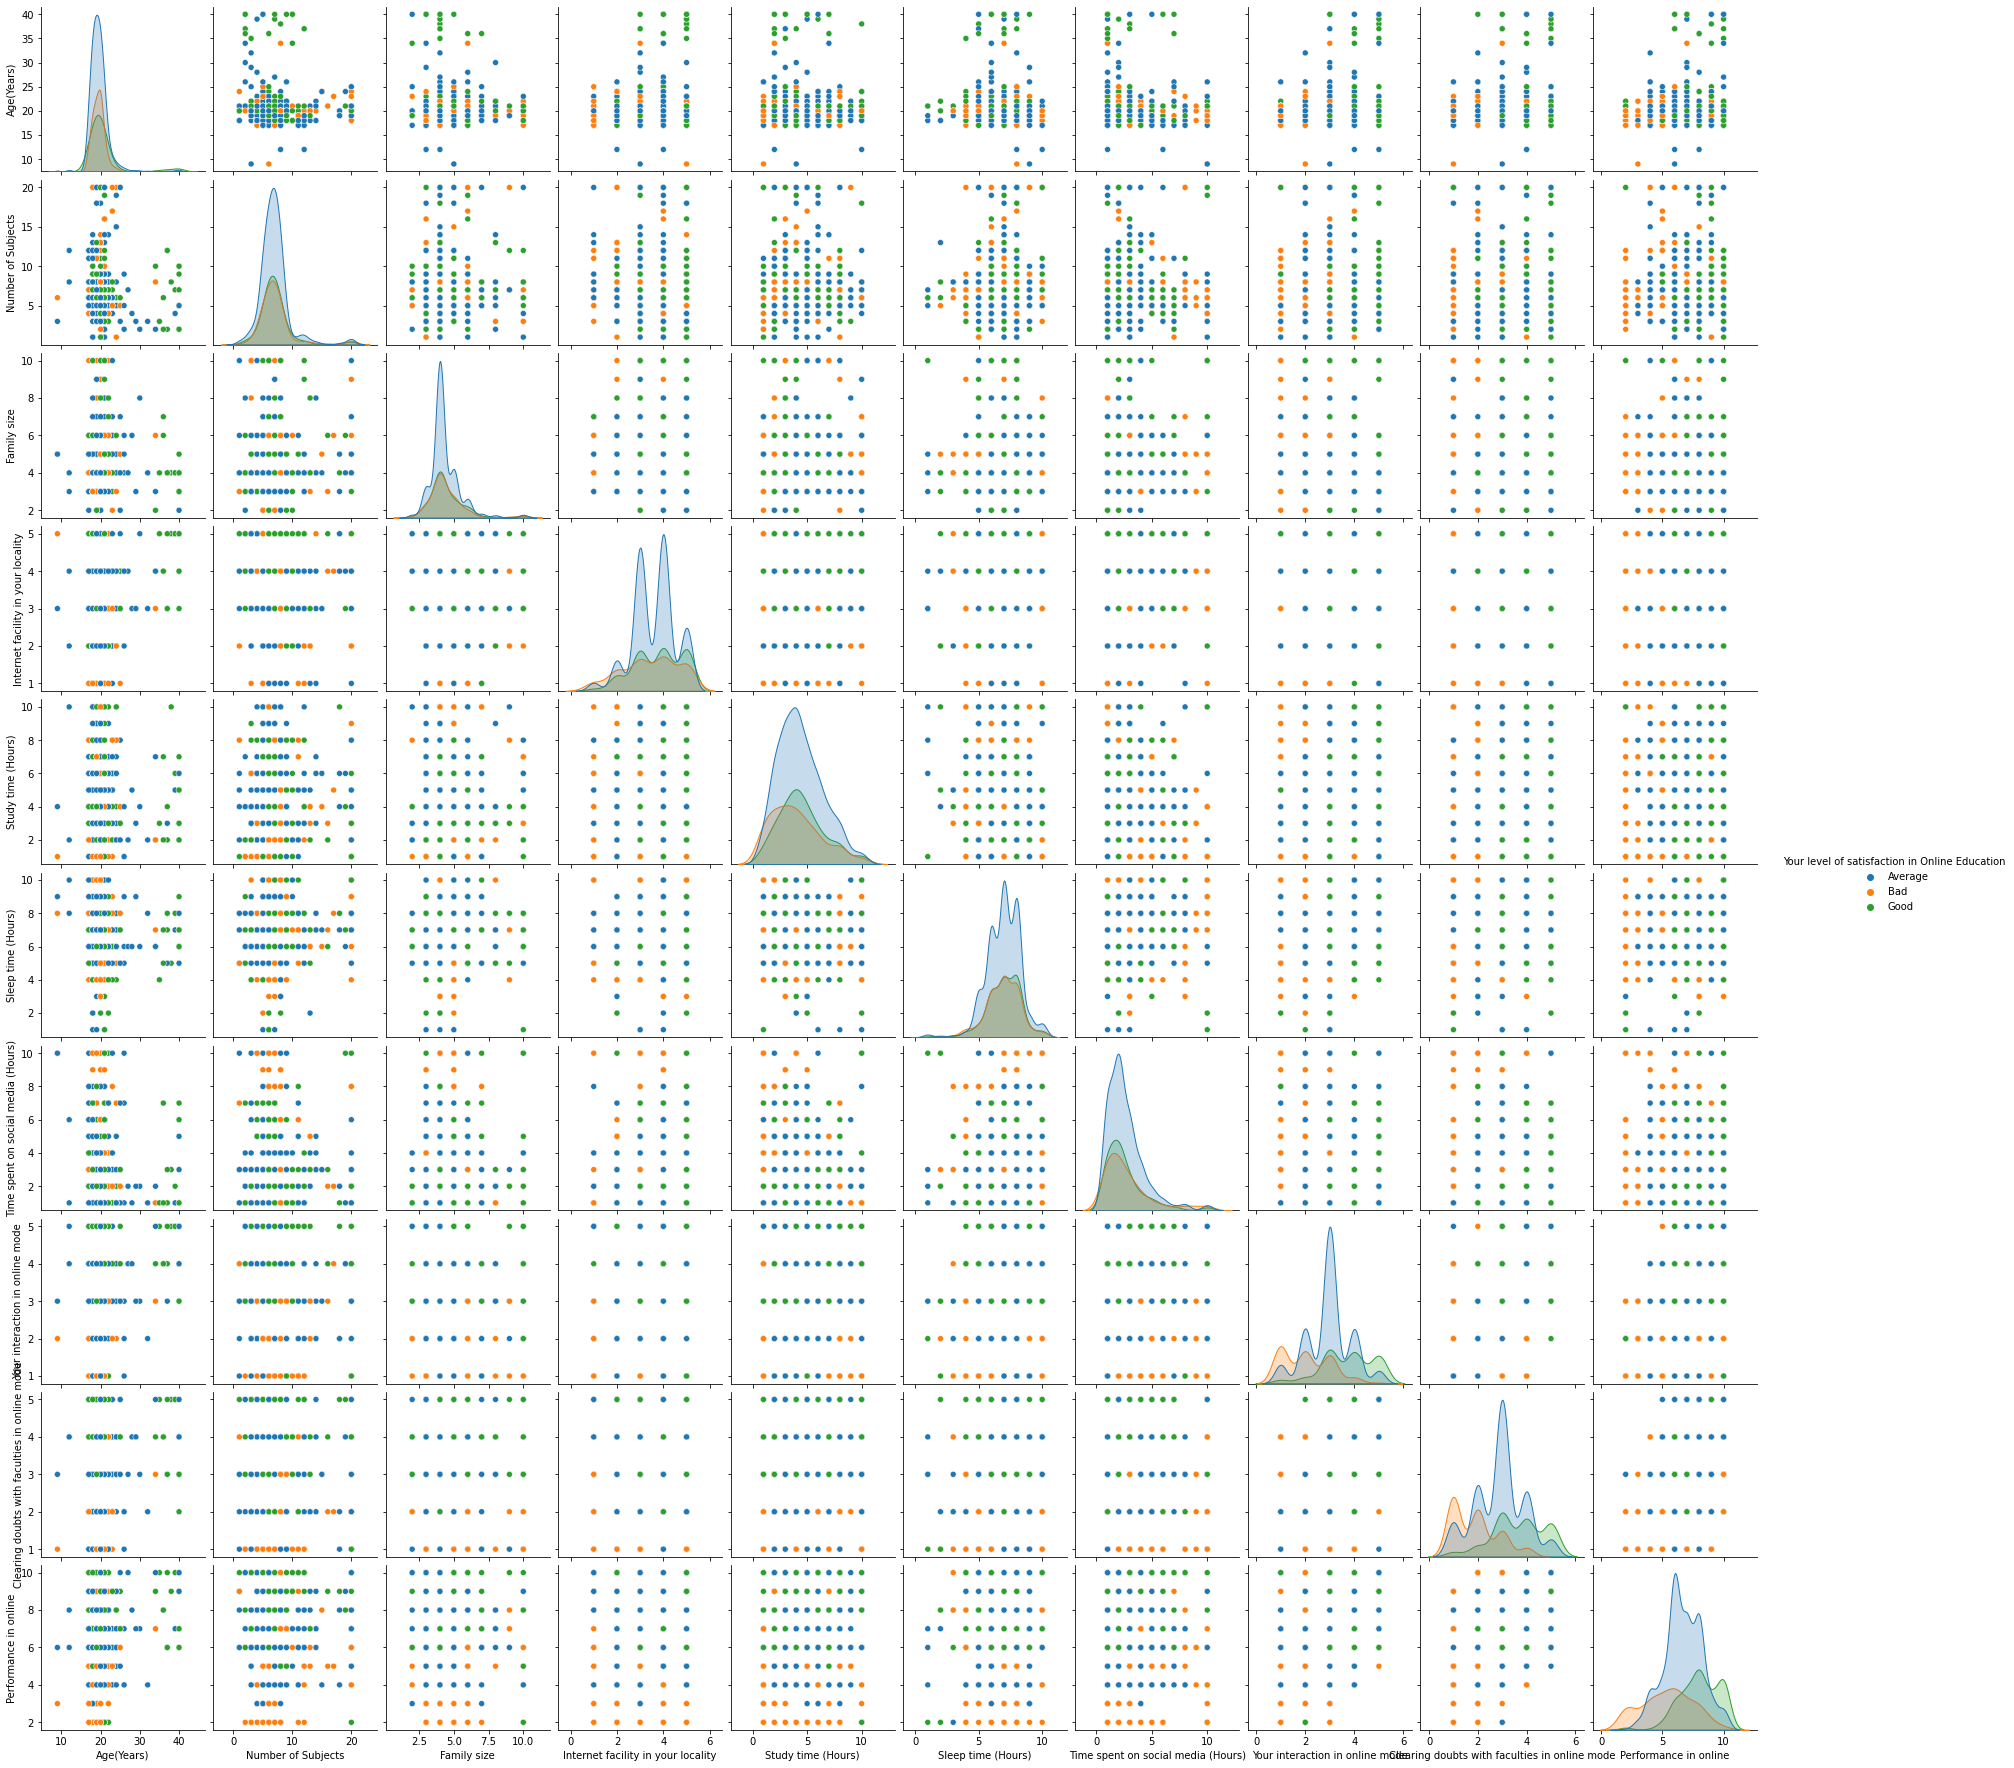

In [15]:
sns.pairplot(df, hue="Your level of satisfaction in Online Education")

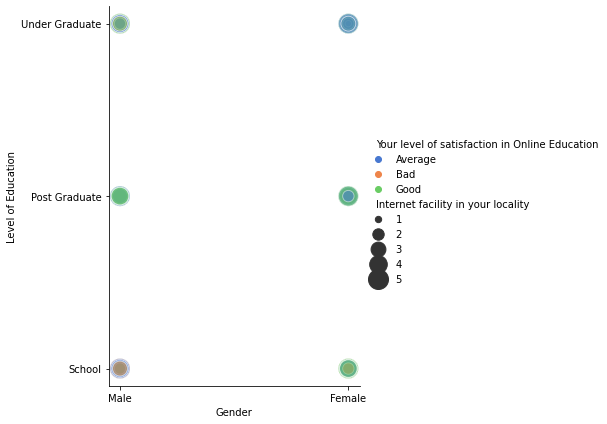

In [16]:
sns.relplot(x="Gender", y="Level of Education", hue="Your level of satisfaction in Online Education", size="Internet facility in your locality",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df)

In [17]:
for c in df.columns:
  print(' ')
  print(df[c].value_counts())
  print(f"The sum of the value_counts of '{c}' are {df[c].value_counts().sum()}")
  print(' ')

 
Male      614
Female    419
Name: Gender, dtype: int64
The sum of the value_counts of 'Gender' are 1033
 
 
Urban    679
Rural    354
Name: Home Location, dtype: int64
The sum of the value_counts of 'Home Location' are 1033
 
 
Under Graduate    817
Post Graduate     129
School             87
Name: Level of Education, dtype: int64
The sum of the value_counts of 'Level of Education' are 1033
 
 
20    249
19    226
18    220
21    127
17     99
22     39
23     19
24     14
40      9
25      7
34      3
37      3
26      3
12      2
9       2
39      2
36      2
38      1
27      1
28      1
30      1
32      1
35      1
29      1
Name: Age(Years), dtype: int64
The sum of the value_counts of 'Age(Years)' are 1033
 
 
7     272
6     232
8     177
5     159
9      36
4      31
3      26
20     21
12     18
11     14
2      10
10     10
13      7
1       6
14      4
18      3
16      2
15      2
19      2
17      1
Name: Number of Subjects, dtype: int64
The sum of the value_counts of 'N

There are no outliers in the data. 

In [18]:
df.isnull().sum() # there are no empty values in this dataset

Gender                                                           0
Home Location                                                    0
Level of Education                                               0
Age(Years)                                                       0
Number of Subjects                                               0
Device type used to attend classes                               0
Economic status                                                  0
Family size                                                      0
Internet facility in your locality                               0
Are you involved in any sports?                                  0
Do elderly people monitor you?                                   0
Study time (Hours)                                               0
Sleep time (Hours)                                               0
Time spent on social media (Hours)                               0
Interested in Gaming?                                         

In [19]:
df.head()

,Gender,Home Location,Level of Education,Age(Years),Number of Subjects,Device type used to attend classes,Economic status,Family size,Internet facility in your locality,Are you involved in any sports?,...,Time spent on social media (Hours),Interested in Gaming?,Have separate room for studying?,Engaged in group studies?,Average marks scored before pandemic in traditional classroom,Your interaction in online mode,Clearing doubts with faculties in online mode,Interested in?,Performance in online,Your level of satisfaction in Online Education
0,Male,Urban,Under Graduate,18,11,Laptop,Middle Class,4,5,No,...,1,No,No,No,91-100,1,1,Practical,6,Average
1,Male,Urban,Under Graduate,19,7,Laptop,Middle Class,4,1,Yes,...,1,Yes,Yes,No,91-100,1,1,Theory,3,Bad
2,Male,Rural,Under Graduate,18,5,Laptop,Middle Class,5,2,No,...,1,No,Yes,No,71-80,1,1,Both,6,Bad
3,Male,Urban,Under Graduate,18,5,Laptop,Middle Class,4,4,Yes,...,2,No,No,yes,91-100,1,2,Theory,4,Bad
4,Male,Rural,Under Graduate,18,5,Laptop,Middle Class,4,3,No,...,2,Yes,Yes,yes,81-90,3,3,Both,6,Average


In [20]:
i=0 # printing all the columns names along with its data types and the number of unique values.
for c in df.columns:  
  print(f"{i}\t{df[c].dtype}\t{df[c].nunique()}\t{c}")
  i=i+1

0	object	2	Gender
1	object	2	Home Location
2	object	3	Level of Education
3	int64	24	Age(Years)
4	int64	20	Number of Subjects
5	object	3	Device type used to attend classes
6	object	3	Economic status
7	int64	9	Family size
8	int64	5	Internet facility in your locality
9	object	2	Are you involved in any sports?
10	object	2	Do elderly people monitor you?
11	int64	10	Study time (Hours)
12	int64	10	Sleep time (Hours)
13	int64	10	Time spent on social media (Hours)
14	object	2	Interested in Gaming?
15	object	2	Have separate room for studying?
16	object	2	Engaged in group studies?
17	object	10	Average marks scored before pandemic in traditional classroom
18	int64	5	Your interaction in online mode
19	int64	5	Clearing doubts with faculties in online mode
20	object	3	Interested in?
21	int64	9	Performance in online
22	object	3	Your level of satisfaction in Online Education


In [64]:
df.head().T

,0,1,2,3,4
Gender,Male,Male,Male,Male,Male
Home Location,Urban,Urban,Rural,Urban,Rural
Level of Education,Under Graduate,Under Graduate,Under Graduate,Under Graduate,Under Graduate
Age(Years),18,19,18,18,18
Number of Subjects,11,7,5,5,5
Device type used to attend classes,Laptop,Laptop,Laptop,Laptop,Laptop
Economic status,Middle Class,Middle Class,Middle Class,Middle Class,Middle Class
Family size,4,4,5,4,4
Internet facility in your locality,5,1,2,4,3
Are you involved in any sports?,No,Yes,No,Yes,No


In [22]:
from sklearn import preprocessing # defining label encoding
  
label_encoder = preprocessing.LabelEncoder()

In [23]:
for c in df.columns: #label encoding the categorical columns with two values.
  if df[c].dtype=="object" and df[c].nunique() == 2:
    df[c]=label_encoder.fit_transform(df[c])

In [24]:
df.head().T

,0,1,2,3,4
Gender,1,1,1,1,1
Home Location,1,1,0,1,0
Level of Education,Under Graduate,Under Graduate,Under Graduate,Under Graduate,Under Graduate
Age(Years),18,19,18,18,18
Number of Subjects,11,7,5,5,5
Device type used to attend classes,Laptop,Laptop,Laptop,Laptop,Laptop
Economic status,Middle Class,Middle Class,Middle Class,Middle Class,Middle Class
Family size,4,4,5,4,4
Internet facility in your locality,5,1,2,4,3
Are you involved in any sports?,0,1,0,1,0


In [25]:
lst=[c for c in df.columns if df[c].dtype=="object" and df[c].nunique() != 2]
 # creating a list of categorical columns with unique values greater than 2.

In [26]:
lst

['Level of Education',
 'Device type used to attend classes',
 'Economic status',
 'Average marks scored before pandemic in traditional classroom',
 'Interested in?',
 'Your level of satisfaction in Online Education']

In [27]:
OHE_data = pd.get_dummies(df, columns = lst[0:5]) # creating dummies of those columns in the list. this will One hot encode the data too.

In [28]:
# label encoding the target column.
OHE_data['Your level of satisfaction in Online Education']=label_encoder.fit_transform(OHE_data['Your level of satisfaction in Online Education'])

In [29]:
OHE_data.head().T

,0,1,2,3,4
Gender,1,1,1,1,1
Home Location,1,1,0,1,0
Age(Years),18,19,18,18,18
Number of Subjects,11,7,5,5,5
Family size,4,4,5,4,4
Internet facility in your locality,5,1,2,4,3
Are you involved in any sports?,0,1,0,1,0
Do elderly people monitor you?,1,1,1,1,0
Study time (Hours),3,7,6,3,8
Sleep time (Hours),6,5,7,6,7


In [30]:
OHE_data.shape

(1033, 40)

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder

In [32]:
Xd=OHE_data.drop(columns=["Your level of satisfaction in Online Education"])
yd=OHE_data["Your level of satisfaction in Online Education"]

train_X, test_X, train_y, test_y = train_test_split(Xd, yd, test_size=0.3, random_state=35)

print(train_X.shape)
print(test_X.shape)

(723, 39)
(310, 39)


In [33]:
from collections import Counter

In [34]:
for u,v in Counter(train_y).items(): # check for class imbalance in target column.
  print(u,v)

2 158
0 393
1 172


In [35]:
from imblearn.over_sampling import SMOTE

In [36]:
oversample = SMOTE() # creating a balanced data using SMOTE technique
oversample = SMOTE(random_state=50)
X_train_bal, y_train_bal = oversample.fit_resample(train_X, train_y)

# summarize distribution
counter = Counter(y_train_bal)
for k,v in counter.items():
	per = v / len(y_train_bal) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Class=2, n=393 (33.333%)
Class=0, n=393 (33.333%)
Class=1, n=393 (33.333%)


In [37]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

### Model-1 Random Forest

In [38]:
RF=RandomForestClassifier()
M1=RF.fit(X_train_bal,y_train_bal)
y_pred1 = M1.predict(test_X)
acc1=accuracy_score(test_y,y_pred1)
report = classification_report(test_y, y_pred1 )
print(report)
print("Accuracy score for Random Forest:",acc1)

              precision    recall  f1-score   support

           0       0.58      0.72      0.65       148
           1       0.67      0.58      0.62        69
           2       0.64      0.46      0.54        93

    accuracy                           0.61       310
   macro avg       0.63      0.59      0.60       310
weighted avg       0.62      0.61      0.61       310

Accuracy score for Random Forest: 0.6129032258064516


### Model 2 Linear support vector machines

In [39]:
from sklearn.svm import LinearSVC

In [40]:
SVC=LinearSVC()
M2=SVC.fit(X_train_bal,y_train_bal)
y_pred2 = M2.predict(test_X)
acc2=accuracy_score(test_y,y_pred2)
report = classification_report(test_y, y_pred2 )
print(report)
print("Accuracy score for Support vector machines:",acc2)

              precision    recall  f1-score   support

           0       0.64      0.56      0.60       148
           1       0.57      0.84      0.68        69
           2       0.60      0.51      0.55        93

    accuracy                           0.61       310
   macro avg       0.60      0.64      0.61       310
weighted avg       0.61      0.61      0.60       310

Accuracy score for Support vector machines: 0.6064516129032258


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### Model-3 Multinomial Naive Bayes

In [41]:
from sklearn.naive_bayes import MultinomialNB

In [42]:
MNB=MultinomialNB()
M3=MNB.fit(X_train_bal,y_train_bal)
y_pred3 = M3.predict(test_X)
acc3=accuracy_score(test_y,y_pred3)
report = classification_report(test_y, y_pred3)
print(report)
print("Accuracy score for Multinomial Naive Bayes is:",acc3)

              precision    recall  f1-score   support

           0       0.55      0.53      0.54       148
           1       0.55      0.62      0.59        69
           2       0.53      0.51      0.52        93

    accuracy                           0.54       310
   macro avg       0.54      0.55      0.55       310
weighted avg       0.54      0.54      0.54       310

Accuracy score for Multinomial Naive Bayes is: 0.5419354838709678


----
----
----
----
----

As there are less samples, we try to upsample and create more samples of the train data.

In [43]:
df22 = train_X.copy()
df22['Your level of satisfaction in Online Education']=train_y.copy()
print(df22.shape)

(723, 40)


In [44]:
df22.head()

,Gender,Home Location,Age(Years),Number of Subjects,Family size,Internet facility in your locality,Are you involved in any sports?,Do elderly people monitor you?,Study time (Hours),Sleep time (Hours),...,Average marks scored before pandemic in traditional classroom_41-50,Average marks scored before pandemic in traditional classroom_51-60,Average marks scored before pandemic in traditional classroom_61-70,Average marks scored before pandemic in traditional classroom_71-80,Average marks scored before pandemic in traditional classroom_81-90,Average marks scored before pandemic in traditional classroom_91-100,Interested in?_Both,Interested in?_Practical,Interested in?_Theory,Your level of satisfaction in Online Education
552,1,1,20,5,6,5,1,1,6,6,...,0,0,0,0,1,0,1,0,0,2
992,1,1,21,5,3,3,1,1,1,8,...,0,1,0,0,0,0,0,1,0,2
1029,0,0,20,6,3,1,0,0,3,7,...,0,0,0,1,0,0,0,0,1,0
24,0,1,18,6,4,5,0,0,4,5,...,0,0,0,0,0,1,0,0,1,0
237,1,1,20,7,3,4,1,1,3,7,...,0,0,0,0,1,0,0,1,0,1


In [45]:
from sklearn.utils import resample # resampling to 30000 samples
dfup = resample(df22, replace=True,n_samples=30000,random_state=42)
print(dfup.shape)

(30000, 40)


In [46]:
dfup.head()

,Gender,Home Location,Age(Years),Number of Subjects,Family size,Internet facility in your locality,Are you involved in any sports?,Do elderly people monitor you?,Study time (Hours),Sleep time (Hours),...,Average marks scored before pandemic in traditional classroom_41-50,Average marks scored before pandemic in traditional classroom_51-60,Average marks scored before pandemic in traditional classroom_61-70,Average marks scored before pandemic in traditional classroom_71-80,Average marks scored before pandemic in traditional classroom_81-90,Average marks scored before pandemic in traditional classroom_91-100,Interested in?_Both,Interested in?_Practical,Interested in?_Theory,Your level of satisfaction in Online Education
574,1,1,20,7,9,4,1,0,8,7,...,0,0,0,1,0,0,0,1,0,1
815,1,1,18,6,4,3,0,1,4,8,...,0,0,0,1,0,0,0,0,1,2
247,1,0,19,20,4,2,1,1,2,9,...,0,0,0,1,0,0,0,1,0,1
163,1,0,19,8,4,4,0,0,3,6,...,0,0,0,1,0,0,0,1,0,0
922,0,0,18,5,6,3,0,0,4,6,...,0,0,0,0,0,1,0,0,1,2


In [47]:
# creating dependent and target variables.
Xda=dfup.drop(columns=["Your level of satisfaction in Online Education"])
yda=dfup["Your level of satisfaction in Online Education"]

In [48]:
oversample = SMOTE(random_state=50)
X_train_bal1, y_train_bal1 = oversample.fit_resample(Xda,yda)

# summarize distribution
counter = Counter(y_train_bal1)
for k,v in counter.items():
	# per = v / len(y_train_bal) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Class=1, n=16387 (33.333%)
Class=2, n=16387 (33.333%)
Class=0, n=16387 (33.333%)


### Creating new models on upsampled train data.

In [49]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

### Model-4 Random Forest

In [50]:
RF=RandomForestClassifier()
M4=RF.fit(Xda,yda)
y_pred4 = M4.predict(test_X)
acc4=accuracy_score(test_y,y_pred4)
report = classification_report(test_y, y_pred4 )
print(report)
print("Accuracy score for Random Forest:",acc4)

              precision    recall  f1-score   support

           0       0.58      0.88      0.70       148
           1       0.79      0.49      0.61        69
           2       0.76      0.33      0.46        93

    accuracy                           0.63       310
   macro avg       0.71      0.57      0.59       310
weighted avg       0.68      0.63      0.61       310

Accuracy score for Random Forest: 0.6290322580645161


### Model-5 Linear support vector machines

In [51]:
SVC=LinearSVC()
M5=SVC.fit(Xda,yda)
y_pred5 = M5.predict(test_X)
acc5=accuracy_score(test_y,y_pred5)
report = classification_report(test_y, y_pred5 )
print(report)
print("Accuracy score for Support vector machines:",acc5)

              precision    recall  f1-score   support

           0       0.59      0.76      0.66       148
           1       0.65      0.49      0.56        69
           2       0.67      0.47      0.55        93

    accuracy                           0.62       310
   macro avg       0.64      0.58      0.59       310
weighted avg       0.63      0.62      0.61       310

Accuracy score for Support vector machines: 0.6161290322580645


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### Model-6 Multinomial Naive bayes

In [52]:
rand_frst=MultinomialNB()
M6=rand_frst.fit(Xda,yda)
# M2=rand_frst.fit(X_train_bal1,y_train_bal1)
y_pred6 = M6.predict(test_X)
acc6=accuracy_score(test_y,y_pred6)
report = classification_report(test_y, y_pred6)
print(report)
print("Accuracy score for Random Forest:",acc6)

              precision    recall  f1-score   support

           0       0.54      0.86      0.66       148
           1       0.76      0.41      0.53        69
           2       0.67      0.26      0.37        93

    accuracy                           0.58       310
   macro avg       0.65      0.51      0.52       310
weighted avg       0.63      0.58      0.55       310

Accuracy score for Random Forest: 0.5806451612903226


## Conclusion

  * The size of the dataset is around 1000 samples. This could be the reason for low accuracy. We upsampled the dataset but there is only small gain in model accuracy. 

In [53]:
print(f" The accuracy for random forest with original dataset is {acc1:.3f}")
print(f" The accuracy for Linear support vector machines with original dataset is {acc2:.3f}")
print(f" The accuracy for multinomial naive bayes with original dataset is {acc3:.3f}")
print(f" The accuracy for random forest with upsampled dataset is {acc4:.3f}")
print(f" The accuracy for Linear support vector machines with upsampled dataset is {acc5:.3f}")
print(f" The accuracy for multinomial naive bayes with upsampled dataset is {acc6:.3f}")

 The accuracy for random forest with original dataset is 0.613
 The accuracy for Linear support vector machines with original dataset is 0.606
 The accuracy for multinomial naive bayes with original dataset is 0.542
 The accuracy for random forest with upsampled dataset is 0.629
 The accuracy for Linear support vector machines with upsampled dataset is 0.616
 The accuracy for multinomial naive bayes with upsampled dataset is 0.581
